Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5283 - loss: 0.6894 - val_accuracy: 0.7014 - val_loss: 0.6150
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7946 - loss: 0.5017 - val_accuracy: 0.8242 - val_loss: 0.3844
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8993 - loss: 0.2626 - val_accuracy: 0.8660 - val_loss: 0.3150
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9498 - loss: 0.1540 - val_accuracy: 0.8782 - val_loss: 0.3024
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9814 - loss: 0.0819 - val_accuracy: 0.8658 - val_loss: 0.3397
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3490

Test Accuracy: 0.8627


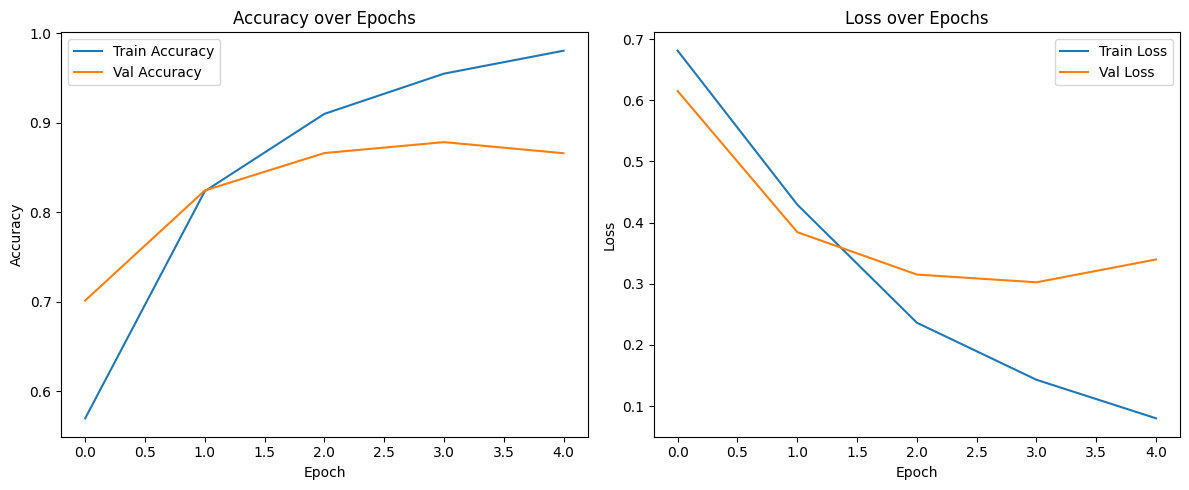

In [2]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Step 2: Load the IMDB Dataset
# num_words=10000 keeps the top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Step 3: Preprocess the Data
# Pad sequences to the same length
maxlen = 200  # Maximum review length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

# Step 4: Build the Deep Neural Network Model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the Model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=512,
                    validation_split=0.2)

# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step 8: Plot Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
